In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # working with directories
import missingno as msno # missings analysis
import numpy as np
from sklearn import metrics # auc calculation
from sklearn import linear_model 
import statsmodels.api as sm

%matplotlib inline

In [2]:
sns.set_style("dark")

In [3]:
source_dir = r'/Task//'
init_data = pd.read_csv(source_dir+r'data-2.csv',sep=';')

Файл “Data-2.csv” содержит перечень количественных факторов (qn01,…qn10) и значения PD для выборки из 303 банков-контрагентов. Размерность факторов qn01-qn06 указана в столбцах “Unit qnXX”, факторы qn07-qn10 представлены в процентах. 

In [4]:
init_data.head()

,PD,qn01,Unit_qn01,qn02,Unit_qn02,qn03,Unit_qn03,qn04,Unit_qn04,qn05,Unit_qn05,qn06,Unit_qn06,qn07,qn08,qn09,qn10
0,0.00025,2193.438720,MLN,6913.265920,MLN,16542.941360,MLN,66144.563760,MLN,168631.75120,MLN,0.000000,MLN,NaN,15.9720,14.0096,0.67056
1,0.00485,81.928000,MLN,22.000000,MLN,1031.096000,MLN,417.472000,MLN,1370.60000,MLN,1432.200000,MLN,109.34000,15.1272,15.1272,0.45760
2,0.08545,615.436052,MLN,144.399807,MLN,3132.243664,MLN,652.291886,MLN,2448.10515,MLN,NaN,MLN,14.43200,15.3120,15.2240,0.20856
3,0.00485,149.451236,MLN,99.557867,MLN,3580.421346,MLN,49.435628,MLN,3664.64501,MLN,4264.509779,MLN,778.89328,12.5664,NaN,1.34376
4,0.02385,52.342400,MLN,21.964800,MLN,262.917600,MLN,105.793600,MLN,502.48880,MLN,575.528800,MLN,105.42400,12.1352,8.2984,2.34960


# Dataset overview

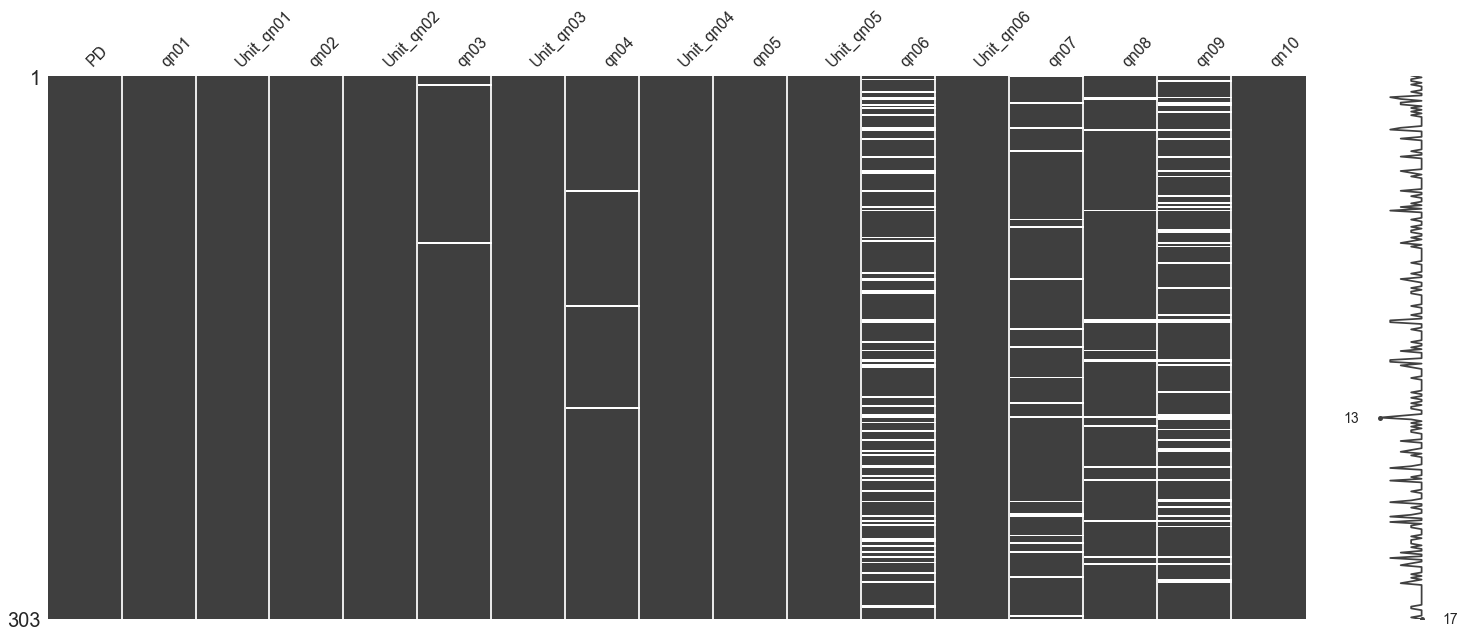

In [5]:
msno.matrix(init_data)

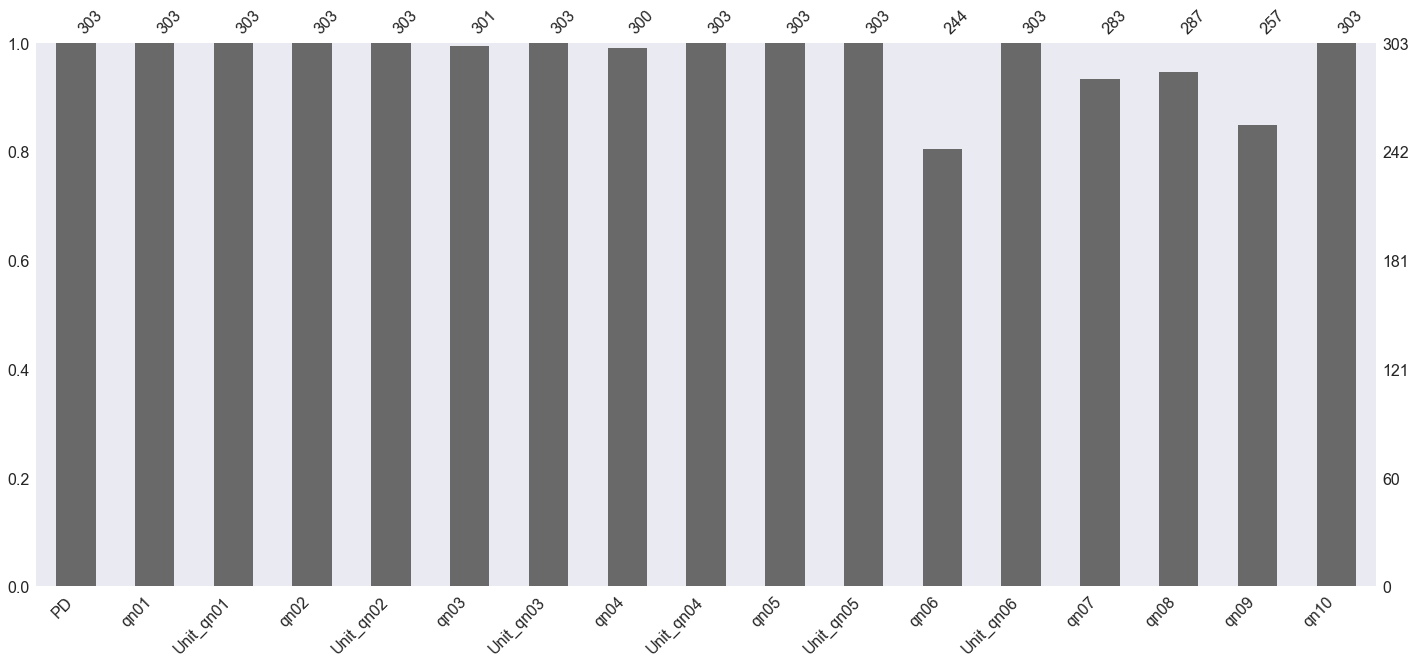

In [6]:
msno.bar(init_data)

In [7]:
init_data.dropna().describe()

,PD,qn01,qn02,qn03,qn04,qn05,qn06,qn07,qn08,qn09,qn10
count,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000,205.000000,205.000000,205.000000
mean,0.017207,3.191583e+04,1.502122e+04,4.197829e+05,1.328302e+05,4.960979e+05,5.507635e+05,119.215202,14.185729,11.901764,0.324873
std,0.049367,1.687953e+05,1.204714e+05,3.122370e+06,7.028815e+05,3.796663e+06,4.309643e+06,157.409600,4.090340,3.929760,3.781081
min,0.000250,8.322160e+00,8.043200e+00,4.004000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-49.060000
25%,0.001050,4.051520e+02,2.016766e+02,6.001623e+03,5.209600e+02,6.402440e+03,5.602925e+03,34.841840,12.258400,9.556800,0.264000
50%,0.003850,1.943249e+03,7.847676e+02,2.766873e+04,4.484216e+03,3.133595e+04,2.920238e+04,75.908800,13.816000,11.704000,0.642400
75%,0.012550,7.687566e+03,3.424022e+03,1.381890e+05,4.839885e+04,1.191505e+05,1.222074e+05,130.303360,15.664000,13.640000,1.078880
max,0.538250,1.680993e+06,1.693916e+06,4.320018e+07,9.659306e+06,5.277921e+07,5.961017e+07,1144.000000,37.576000,37.400000,3.280640


In [8]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
PD           303 non-null float64
qn01         303 non-null float64
Unit_qn01    303 non-null object
qn02         303 non-null float64
Unit_qn02    303 non-null object
qn03         301 non-null float64
Unit_qn03    303 non-null object
qn04         300 non-null float64
Unit_qn04    303 non-null object
qn05         303 non-null float64
Unit_qn05    303 non-null object
qn06         244 non-null float64
Unit_qn06    303 non-null object
qn07         283 non-null float64
qn08         287 non-null float64
qn09         257 non-null float64
qn10         303 non-null float64
dtypes: float64(11), object(6)
memory usage: 40.3+ KB


# Factors distribution

In [9]:
distr_path = source_dir+'factors_distribution'
if not os.path.exists(distr_path):
    os.makedirs(distr_path)

In [71]:
def draw_distribution(df,variable,bins=50,title='',xlabel='values',\
                      ylabel='observations',ticks_rot=45,save_path='',color='cornflowerblue'):
    'Plotting histograms of factors distribution'
    fig = plt.figure()
    plt.title(variable+' '+title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=ticks_rot)
    series = df[variable].dropna()
    plt.hist(series,color=color,bins=bins,edgecolor='black')
    if save_path!='':
        fig.savefig(save_path+'/'+variable+'.png',dpi=200,bbox_inches='tight',\
                    facecolor=fig.get_facecolor(),edgecolor=fig.get_edgecolor())

In [72]:
factors = [var for var in list(init_data) if 'PD' not in var and 'Unit' not in var]

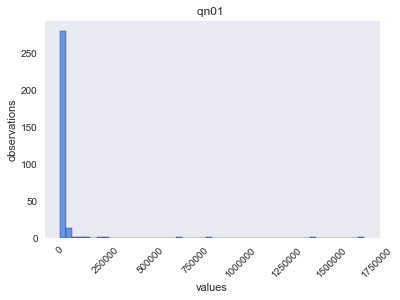

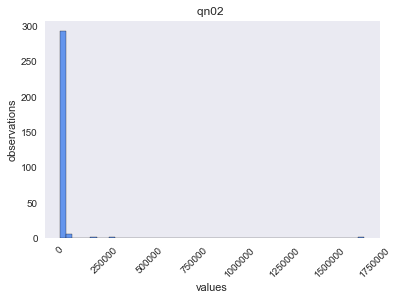

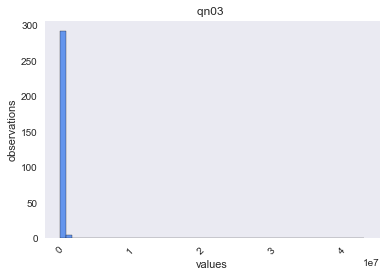

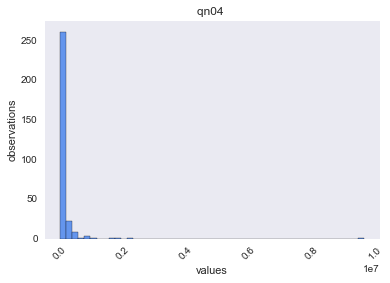

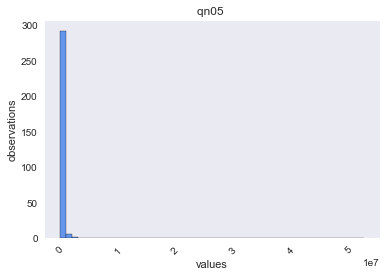

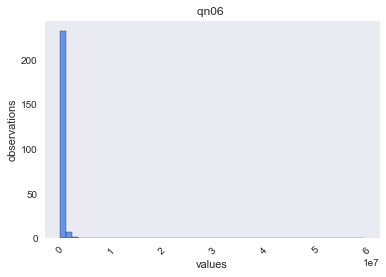

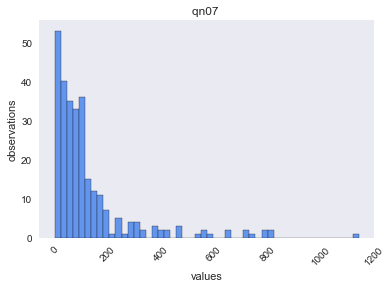

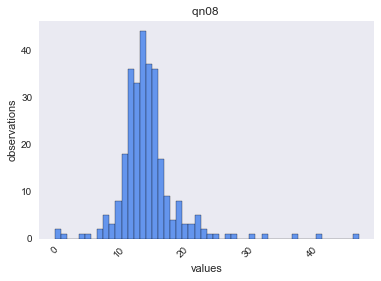

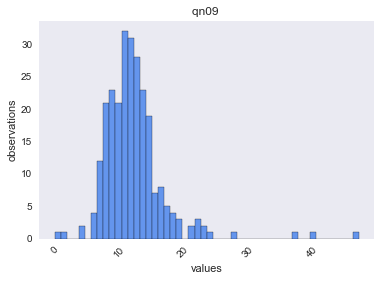

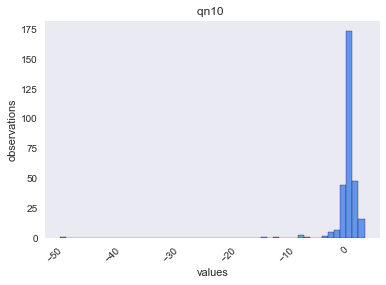

In [73]:
for factor in factors:
    draw_distribution(init_data,factor,save_path=distr_path)

# 1. Factors transformation 

In [42]:
def sigmoid(x):
    'Implementation of sigmoid function'
    return 1/(1+np.exp(-x))

In [43]:
def transform(features,factors_cnt):
    'Logit transformation and normalization'
    x_up = np.nanpercentile(features, 95, axis=0).reshape(factors_cnt,1)
    x_down = np.nanpercentile(features, 5, axis=0).reshape(factors_cnt,1)
    M = (x_up+x_down)/2.0
    S = 2*np.log(19)/(x_up-x_down)
    tf = sigmoid(S.T*(M.T-features))
    mu = np.nanmean(tf,axis=0).reshape(factors_cnt,1).T
    sigma = np.nanstd(tf,axis=0).reshape(factors_cnt,1).T
    return (tf-mu)/sigma*50

In [44]:
features = np.array(init_data[factors])
factors_cnt = len(factors)
tf = transform(features,factors_cnt)

Check means and stds

In [45]:
np.nanmean(tf,axis=0)

array([  5.62806127e-16,  -7.59788272e-15,  -1.54855825e-14,
         1.53950926e-14,   9.00489804e-15,  -2.14327645e-14,
         2.41032165e-14,  -1.98060693e-16,   2.65416742e-15,
        -3.75204085e-16])

In [46]:
np.nanstd(tf,axis=0)

array([ 50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.])

# 2. One-factor analysis

In [47]:
obs_cnt = len(init_data)

In [48]:
sample = np.concatenate((np.array(init_data.PD).reshape(obs_cnt,1),tf),axis=1)

In [49]:
roc_path = source_dir+'factors_roc'
if not os.path.exists(roc_path):
    os.makedirs(roc_path)

In [50]:
def roc_plot(factor,K,x_current,y_current,save_path='',aps=np.nan):
    'Plot ROC-curve for ideal, random and current factor'
    fig = plt.figure()
    
    x_ideal = [0,K,1]
    y_ideal = [0,1,1]

    x_random = [0,0.5,1]
    y_random = [0,0.5,1]

    plt.plot(x_ideal,y_ideal,'g')
    plt.plot(x_random,y_random,'--',color='gray')
    plt.plot(x_current,y_current,'--')
    
    plt.legend(['ideal','random','current'])
    plt.grid()
    plt.title(factor+', APS='+str(aps))
    if save_path!='':
        fig.savefig(save_path+'/'+factor+'.png',dpi=200,bbox_inches='tight',\
                    facecolor=fig.get_facecolor(),edgecolor=fig.get_edgecolor())

In [51]:
def calculate_aps(K,x_current,y_current):
    'Returns APS'
    x_ideal = [0,K,1]
    y_ideal = [0,1,1]
    A = metrics.auc(x_current, y_current)-0.5
    B = metrics.auc(x_ideal, y_ideal)-0.5
    return A/(A+B)

In [53]:
# for i in range(1,factors_cnt+1):
def compute_roc_aps(sample,factors,factors_cnt,roc_path):
    'Computes APS and draws ROC-curves'
    aps_by_factor = {}
    for factor_ind in range(1,factors_cnt+1):
        cum_pd = 0
        pd_factor = sample[:,[0,factor_ind]] # take pd and factor values
        pd_factor = pd_factor[np.argsort((-pd_factor)[:, 1])] # sort descending w.r.t. factor values
        pd = pd_factor[:,[0]]
        factor = pd_factor[:,[1]]
        pd = pd[~np.isnan(factor)] # remove items where factor is nan
        factor = factor[~np.isnan(factor)] # remove items where factor is nan
        total_pd = pd.sum()
        N = len(factor)
        K = total_pd/N
        x_current = []
        y_current = []
        for i in range(N):
            cum_pd = cum_pd+pd[i]
            x_current.append(i/float(N))
            y_current.append(cum_pd/total_pd)

        aps = calculate_aps(K,x_current,y_current)
        roc_plot(factors[factor_ind-1],K,x_current,y_current,save_path=roc_path,aps=aps)
        aps_by_factor[factors[factor_ind-1]] = aps
    return aps_by_factor
        

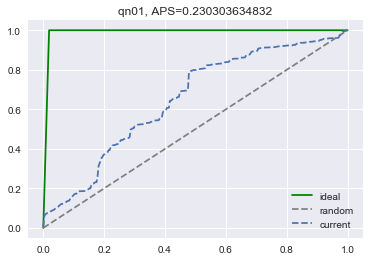

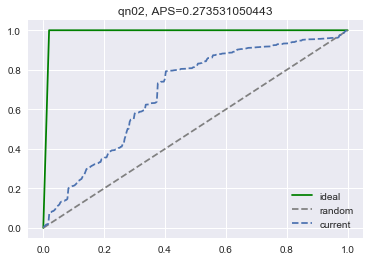

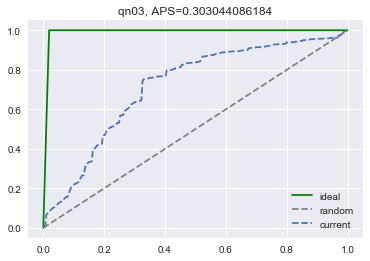

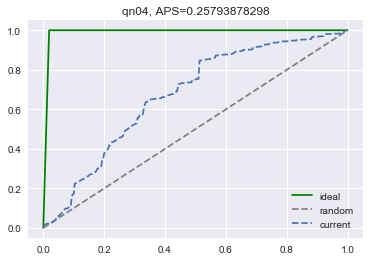

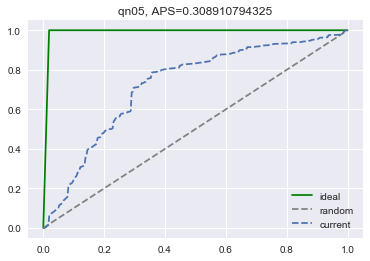

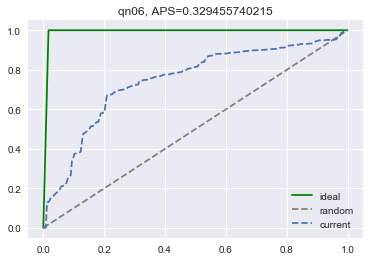

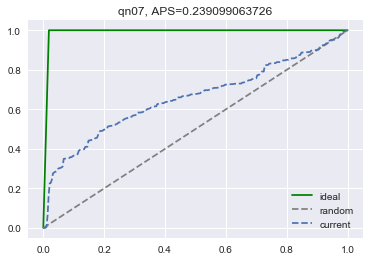

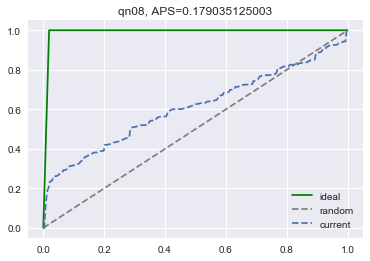

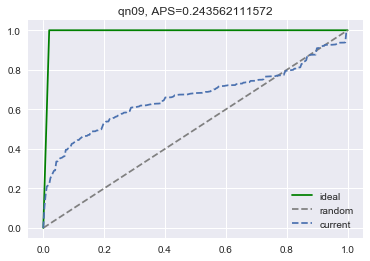

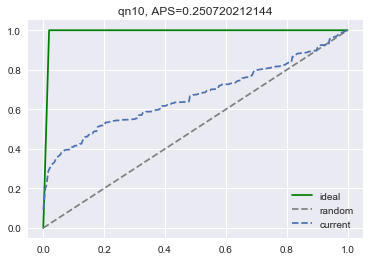

In [54]:
aps_by_factor = compute_roc_aps(sample,factors,factors_cnt,roc_path)

In [55]:
aps_by_factor

{'qn01': 0.23030363483158475,
 'qn02': 0.27353105044314052,
 'qn03': 0.30304408618420342,
 'qn04': 0.25793878297988448,
 'qn05': 0.30891079432515728,
 'qn06': 0.32945574021530061,
 'qn07': 0.23909906372593243,
 'qn08': 0.17903512500273441,
 'qn09': 0.2435621115718431,
 'qn10': 0.25072021214356383}

In [56]:
for factor in aps_by_factor:
    if aps_by_factor[factor]>=0.3:
        print('Factor',factor,'is selected for multiple factor analysis')

Factor qn03 is selected for multiple factor analysis
Factor qn06 is selected for multiple factor analysis
Factor qn05 is selected for multiple factor analysis


# 3. Multiple factor analysis

In [60]:
# fill nans with median value
col_mean = np.nanmedian(sample, axis=0)
inds = np.where(np.isnan(sample))
sample[inds] = np.take(col_mean, inds[1])

### Fit the GLM model

In [61]:
pd = sample[:,[0]]
X2 = sm.add_constant(sample[:,[3,5,6]])
Y = np.log((1-pd)/pd)
regression = sm.OLS(Y, X2)
model = regression.fit()
print('Model parameters:', model.params)
print(model.summary())

Model parameters: [ 5.30409804 -0.01040207 -0.01454195  0.01965836]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     11.19
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           5.59e-07
Time:                        01:01:44   Log-Likelihood:                -588.62
No. Observations:                 303   AIC:                             1185.
Df Residuals:                     299   BIC:                             1200.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------

### Predict in sample

In [63]:
pd_model = 1/(1+np.exp(model.predict(X2)))

### APS

In [64]:
predicted_sample = np.concatenate((np.array(pd_model).reshape(obs_cnt,1),tf[:,[3,5,6]]),axis=1)

In [65]:
pred_roc_path = source_dir+'pred_factors_roc'
if not os.path.exists(pred_roc_path):
    os.makedirs(pred_roc_path)

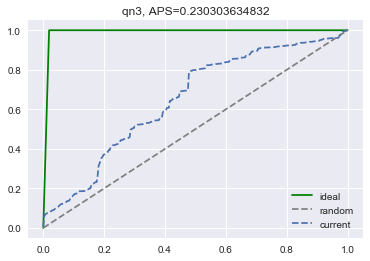

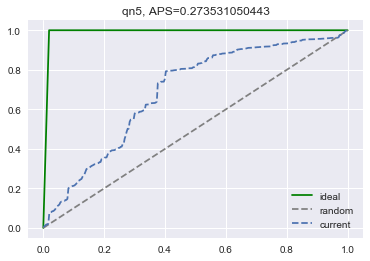

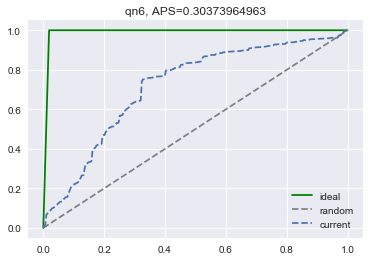

In [66]:
aps_by_factor = compute_roc_aps(sample,['qn3','qn5','qn6'],3,pred_roc_path)